✅ Updated dataset saved as 'updated_fashion_sentiment.csv'.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


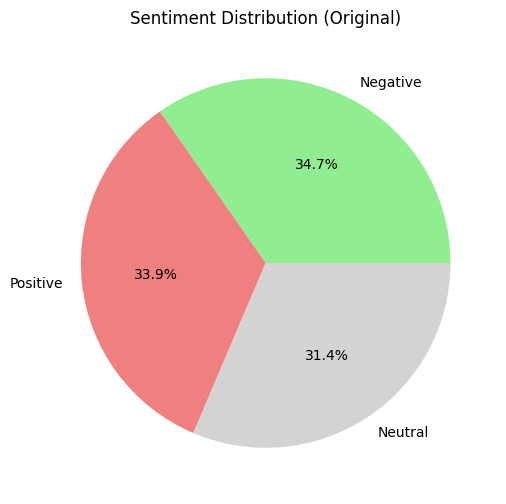

<ipython-input-7-e3e99a836141>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=['Positive', 'Negative', 'Neutral'], palette='pastel')


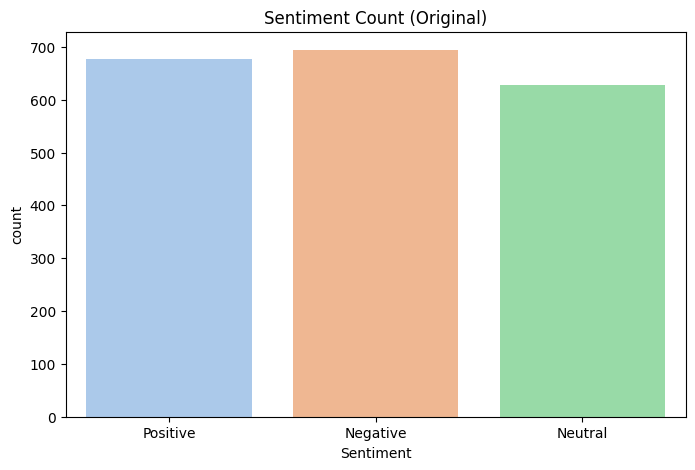

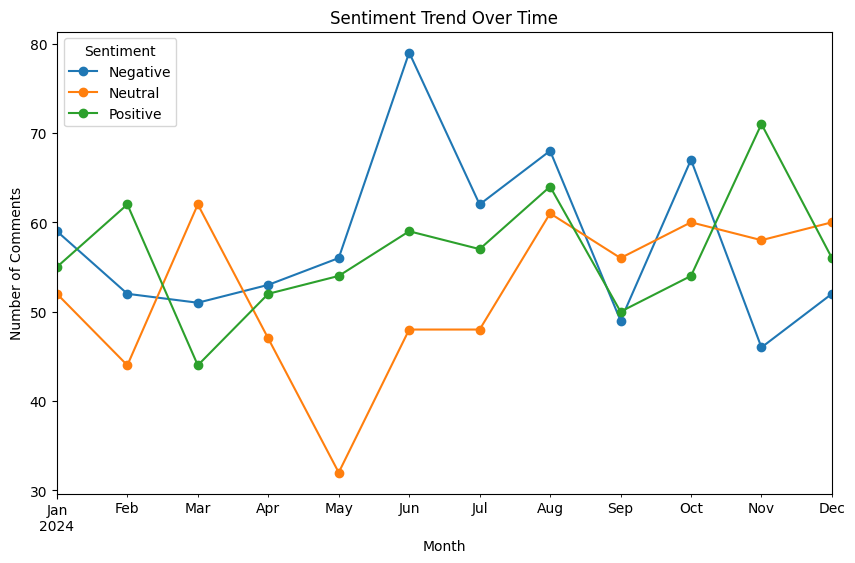

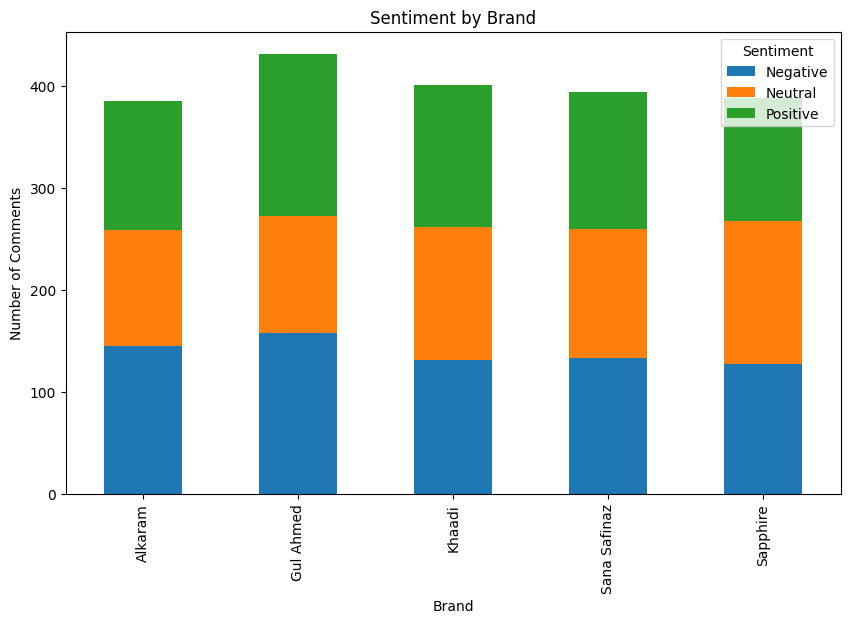

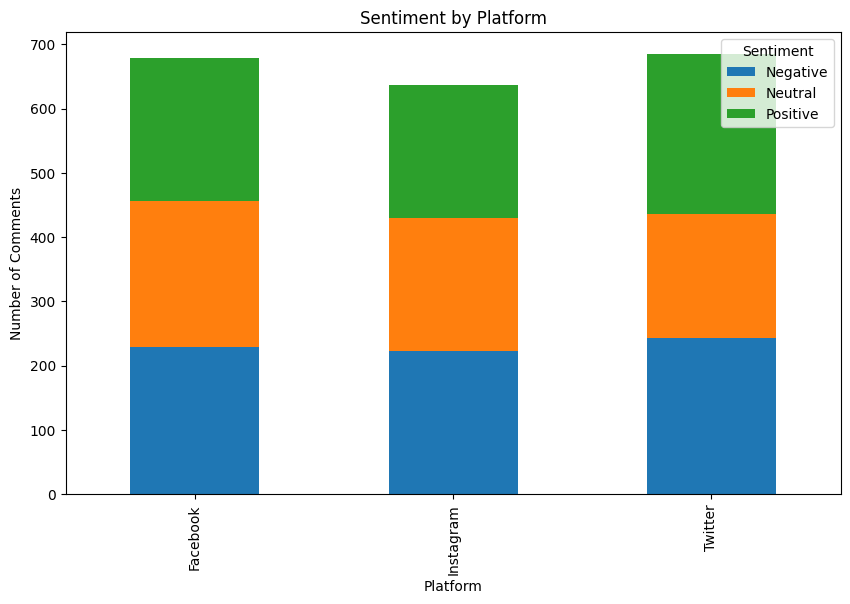

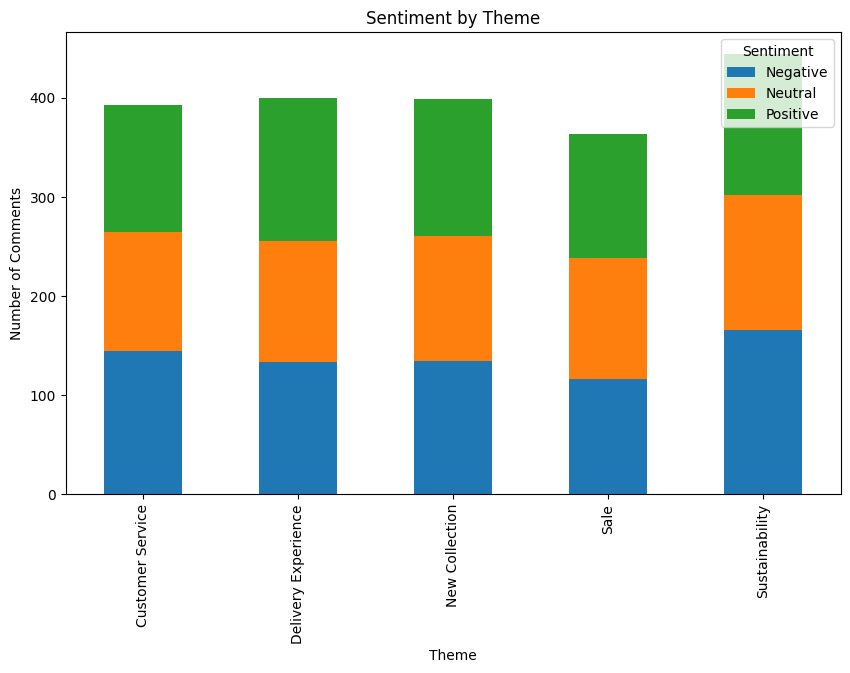


🔍 Top Positive Keywords: [('great', 151), ('quality', 151), ('beautiful', 151), ('designs', 151), ('loved', 138), ('new', 138), ('collection', 138), ('absolutely', 138), ('stunning', 138), ('appreciate', 137)]
🔍 Top Negative Keywords: [('poor', 141), ('fabric', 141), ('quality', 141), ('worth', 141), ('price', 141), ('bad', 141), ('experience', 141), ('website', 141), ('slow', 141), ('received', 140)]


In [7]:
import subprocess
import sys

try:
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "vaderSentiment"])
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from collections import Counter

df = pd.read_csv('pakistani_fashion_sentiment_dataset.csv')

df = df.drop_duplicates()

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

nltk.download('stopwords')
stopwords_set = set(nltk.corpus.stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', str(text))
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords_set])
    return text

df['cleaned_comment'] = df['Comment'].apply(clean_text)

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Predicted_Sentiment'] = df['Comment'].apply(get_sentiment)

df.to_csv('updated_fashion_sentiment.csv', index=False)
print("✅ Updated dataset saved as 'updated_fashion_sentiment.csv'.")

sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen','lightcoral','lightgrey'])
plt.title('Sentiment Distribution (Original)')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Sentiment', order=['Positive', 'Negative', 'Neutral'], palette='pastel')
plt.title('Sentiment Count (Original)')
plt.show()

df['Month'] = df['Date'].dt.to_period('M')
monthly_sentiment = df.groupby(['Month', 'Sentiment']).size().unstack().fillna(0)
monthly_sentiment.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Sentiment Trend Over Time')
plt.ylabel('Number of Comments')
plt.xlabel('Month')
plt.show()

brand_sentiment = df.groupby(['Brand', 'Sentiment']).size().unstack().fillna(0)
brand_sentiment.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment by Brand')
plt.ylabel('Number of Comments')
plt.show()

platform_sentiment = df.groupby(['Platform', 'Sentiment']).size().unstack().fillna(0)
platform_sentiment.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment by Platform')
plt.ylabel('Number of Comments')
plt.show()

theme_sentiment = df.groupby(['Theme', 'Sentiment']).size().unstack().fillna(0)
theme_sentiment.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment by Theme')
plt.ylabel('Number of Comments')
plt.show()

positive_comments = ' '.join(df[df['Sentiment'] == 'Positive']['cleaned_comment'])
negative_comments = ' '.join(df[df['Sentiment'] == 'Negative']['cleaned_comment'])

positive_words = Counter(positive_comments.split()).most_common(10)
negative_words = Counter(negative_comments.split()).most_common(10)

print("\n🔍 Top Positive Keywords:", positive_words)
print("🔍 Top Negative Keywords:", negative_words)
